In [5]:
# import libraries
%matplotlib inline
import sys
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
#from ggplot import *
#from sklearn.neighbors import KernelDensity
import notebook_library as lib
#from sklearn.model_selection import GridSearchCV
#import scipy.stats as st
#import sklearn

In [6]:
# SGD dataset on hand
sgd = lib.open_sgd(600)

# Exclude the chromosome 17 or mitochondrial as well as others like 2u from a plasmid?
sgd = sgd[sgd.chromosome.isin(map(str,range(1,17)))]

In [10]:
# Find the closest promoter-centers to each of the promoter-centers in SGD 
# One per-chromosome !!!
dist_total = []
for i in range(1,17):
    s_i=str(i)    
    nbs = NearestNeighbors(n_neighbors=5,algorithm='ball_tree',).fit(sgd[sgd.chromosome==s_i]['promoter_median'].values.reshape(-1,1))
    # and split the results into distances and indices.
    distances, indices = nbs.kneighbors(sgd[sgd.chromosome==s_i]['promoter_median'].values.reshape(-1,1))
    
    # Each row in indices have the key of the gene in SGD and of the closest (promoter) genes
    # and these are the distances between the center of the promoter and the center-promoter of the closest promoters
    for j in distances.astype(int):
        dist_total.append(j)

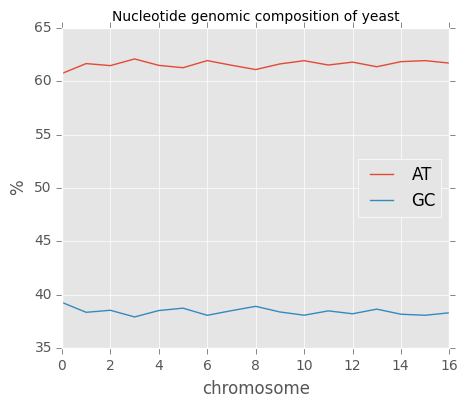

In [170]:
# Info obtained with borrar.py @gcn4_ChEC folder from chromosomes @SGD website
nt = pd.read_csv('ACGT_genome.csv')
nt.set_index('chromosome')
nt['total'] = nt[['A','C','T','G']].sum(axis=1)
nt.loc[len(nt.index)] = nt[['A','C','G','T','total']].sum(axis=0)
nt['AT'] = (nt['A'] + nt['T'])*100 / nt.total
nt['GC'] = (nt['G'] + nt['C'])*100 / nt.total
#nt_norm = pd.DataFrame([nt.loc[i,['A','G','C','T']]*100/nt.loc[i,'total'] for i in nt.index])

# Let's have a look at it
plt.style.use('ggplot')
nt[['AT','GC']].plot(figsize=(5,4))
plt.ylabel('%')
plt.xlabel('chromosome')
plt.title('Nucleotide genomic composition of yeast', fontsize=10)
#plt.rcParams.update(plt.rcParamsDefault)